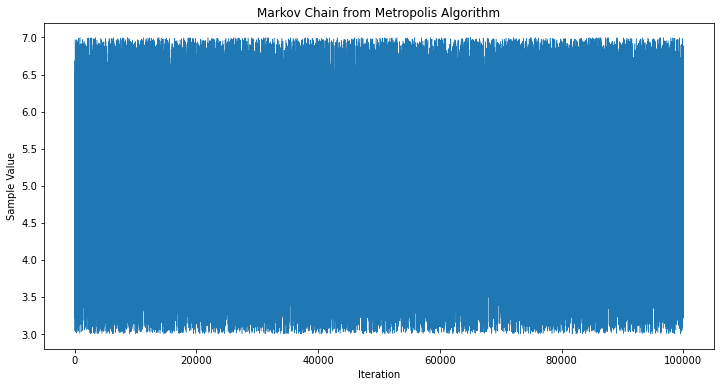

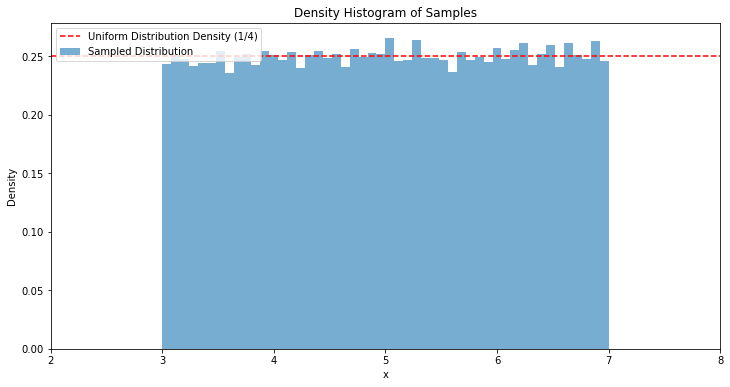

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Target density function (Uniform over 3 < x < 7)
def target_density(x):
    return 1.0 if 3 < x < 7 else 0.0

# Metropolis algorithm
def metropolis(target_density, proposal_std, initial, n_samples):
    samples = [initial]
    x_current = initial

    for _ in range(n_samples - 1):
        x_proposal = np.random.normal(x_current, proposal_std)
        acceptance_ratio = target_density(x_proposal) / target_density(x_current)
        
        if np.random.rand() < acceptance_ratio:
            x_current = x_proposal
        
        samples.append(x_current)
    
    return np.array(samples)

# Parameters
initial = 5  # Start within the interval
n_samples = 100000
proposal_std = 1.0

# Run Metropolis algorithm
samples = metropolis(target_density, proposal_std, initial, n_samples)

# Plot the Markov Chain
plt.figure(figsize=(12, 6))
plt.plot(samples, lw=0.5)
plt.title('Markov Chain from Metropolis Algorithm')
plt.xlabel('Iteration')
plt.ylabel('Sample Value')
plt.show()

# Plot the density histogram of the samples
plt.figure(figsize=(12, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Sampled Distribution')
plt.axhline(1/4, color='red', linestyle='--', label='Uniform Distribution Density (1/4)')
plt.xlim(2, 8)  # Extend a bit beyond the interval for visibility
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title('Density Histogram of Samples')
plt.show()
